## The halving algorithm with decision trees

In two cases

1. Apply the halving algorithm to decision trees, assuming there exists a correct tree of a given size. (with binary inputs, and we know the size or a good upper bound on the size of such a tree.)

2. Modify the algorithm for the case no good upper bound on the size known. (we will see how many mistakes we make before we find such a good tree.)

$\mathcal H_k = $ decision trees with at most $k$ nodes (leaves are included)



Case 1. __Fitting trees in $\mathcal H_k$ with the halving algorithm__

- Given a problem for which there exists a decision tree with $k$ nodes always predicts correct.

- We run the having algorithm with the class $\mathcal H_k$

- How many mistaks? $\log_2 |H_k|$

$|H_k| \le (p+|y|)^k \implies |H_k| \le (p+2)^k$

(In previous lesson, we calculated $|H_k| \le (p+|y|)^k$, where $p$ is the input dimension, $k$ is total nodes, $|y| = 2$)

If a decision tree with at most $k$ nodes classifies all pairs $(x_1, y_1), (x_2, y_2), \dots$ correctly, then the number of mistakes made by the halving algorithm is at most

$1 \le |\mathcal F_t| \le (p+|y|)^k 2^{-m} \implies 2^m \le (p+2)^k \implies m \le k\log_2(p+2)$

$k \log_2(p+2)$

Case 2. __What if $k$ is not known?__

Subsequently run the halving algorithm for $\mathcal H_1, \mathcal H_2, \mathcal H_3, \dots$

Start with $\mathcal H_{j+1}$ when every tree in $\mathcal H_j$ contradicts the data.

If a tree in $\mathcal H_k$ is consistent with all data, the number of mistakes is at most: (as long as $\mathcal H_k$ is consistent with the data we make at most $\log_2 \mathcal H_k$ many mistakes. To contradict all that, we need to make one more mistake.)

$\sum_{k^{'}\le k}(1+k^{'}\log(p+2)) = k+\frac{1}{2} k(k+1) \log(p+2) \le \frac{1}{2}k(k+3)\log(p+2)$

This is quadratic to k, but we can do better

### Weighted halving algorithm

__Thorem__
>If some $f \in \mathcal H_k$ is true, then the number of mistakes of the weighted halving algorithm is at most
>
> $\log_2|\mathcal H_k| + \log_2(2k^2)$

($\log_2|\mathcal H_k| + \log_2(2k^2) = \log_2|\mathcal H_k| + 2 \log_2 k + 1$)

__Algorithm:__

For all $\mathcal H_k$ and $f \in \mathcal H_k$, assign the weight$^* w_f=\frac{1}{2k^2} \cdot \frac{1}{|\mathcal H_k|}$  
(Instead of subsequently run the halving algorithm for $\mathcal H_1, \mathcal H_2, \mathcal H_3, \dots$, we assign a weight to each of them)

Let $\mathcal y = \{-1, +1\}$. Let $sign(t)= 1$ if $t \ge 0$ and $-1$ otherwise. ($f(x)= -1 \text{or} +1$)

>$\mathcal F_1 \gets \bigcup_j \mathcal H_j$
>
>While true:  
>    $\;\;\;\;\;\;\;$Reveive $x_t$  
>    $\;\;\;\;\;\;\;$Predict $y_t = sign(\sum_{f \in \mathcal F_t} w_f \cdot f(x_t))$  
>    $\;\;\;\;\;\;\;$Receive $y_t$  
>    $\;\;\;\;\;\;\;$$\mathcal F_{t+1} \gets \{f \in \mathcal F_{t} : f(x_t) = y_t \}$ (each step we remove $f$ that predicted wrongly from the maintained classifiers set)  

We maintain a set of classifiers that are consistent with previously seen data.

For the prediction, we consider two groups of classifiers, classifiers that predict +1, and classifiers that predict -1. We select the group that has largest total weight. 

In the sum of this expression   
all classifiers that predict +1, their weights are added to the factor +1.  
all classifiers that predict -1, their weights are added to the factor -1.

So when next input come,  
we predict -1, if the negative functions have larger weight  
we predict 1, if the positive functions have larger weight  
In other word, we take weight majority.

Then we receive the correct label, and we update the set of functions that are consistent with previously seen data. 

We've chosen this factor $\frac{1}{2k^2}$, in such a way that the sum of all weights of classifier is at almost 1.
($\sum^{\infty}_{n=1} \frac{1}{n^2} = \frac{\pi^2}{6}$)

### Proof the # mistakes $\le \log_2|\mathcal H_k| + \log_2(2k^2)$

Let $W(\mathcal F_{t}) = \sum \{w_f : f\in \mathcal F_t\}$ (total weight of the class of consistent functions)

- if $\hat{y}_t \ne y_t$, then $W(\mathcal F_{t+1}) \le \frac{1}{2}W(\mathcal F_t)$ (in each step where the weighted majority makes a mistake, the total weight decreases by at least 1/2)
- Thus after m mistakes, we have $W(\mathcal F_t) \le 2^{-m}$ (at beginning, the mistake was at most 1)
- The true hypothesis is always in $\mathcal F_t$ thus (the assumption there is one function always predict correct result, we can never remove it, it will never contradict the data.)  
$\frac{1}{2k^2} \cdot \frac{1}{\mathcal H_k} \le W(\mathcal F_t) \le 2^{-m}$

($ W(\mathcal F_t)$ is always at least the weight of true hypothesis)

$\implies m \le \log_2(2k^2 \cdot |\mathcal H_k|)$

## Conclusion

If a decision tree with at most $k$ nodes classifies all pairs $(x_1, y_1), (x_2, y_2), \dots$ correctly, then the number of mistakes made by the halving algorithm is at most

$k \log(p+2)$  if $k$ is given  
$k \log(p+2)+2 \log k +1$  if $k$ is not given

## The weighted majority algorithm

Previously: we assume there is a true model in $\mathcal H$

Now: labels can be anything = "agnostic setting"  
Goal: predict almost as goos as the best model

Fix a finite set of binary classifier $\mathcal H$ mapping $\mathcal X \to \mathcal y$

__Theorem__

Let $\beta \ge 0$ and $\beta < 1$. There exists an online learning algorithm $A$ such that for all $m$ and all $(x_1, y_1), (x_2, y_2), \dots \in \mathcal X \times \mathcal y$ on which some $f \in \mathcal H$ makes at most $m$ mistakes, the number of mistakes on the sequence is at most 

$\large \frac{\log |\mathcal H| + m \cdot \log \frac{1}{\beta}}{\log \frac{2}{1+\beta}}$

(This leads to Bias-complexity trade off, when select the size of the hypothesis)

Here you may assume $0 \cdot \log  (1/0) = 0$, (which is not always true). Observe that

$\frac{\log (1/\beta)}{log(2/(1+\beta))} \ge 1$

If $0 < \beta < 1$. The limit of above formula is 1 when $\beta$ approches 1.


Is this algorithm an improvement on the halving algorithm? More precisely, if we apply the algorithm in the realizable setting, can we conclude that its number of mistakes satisfies the bound of the halving algorithm?

__Yes, we can apply it for m = 0 and $\beta = 0$.__

For convenience, Let $\mathcal y =\{-1, +1\}$ and $0 \le \beta < 1$

__weighted majority algorithm__

> For each $f \in \mathcal H : w_{f,1} \gets 1/|\mathcal H|$.
>
> while True:  
> $\;\;\;\;\;\;$Receive $x_t$  
> $\;\;\;\;\;\;$Predict $sign\sum_{f \in \mathcal H} w_{f,t}f(x_t)$  
> $\;\;\;\;\;\;$Receive $y_t$  
> $\;\;\;\;\;\;$For each $f\in \mathcal H$:  
>
>$w_{f, t+1} \gets \begin{cases} \beta \cdot w_{f,t} \;\;\;\; if \;\; f(x_t) \ne y_t \\ w_{f,t} \;\;\;\; otherwise \end{cases}$

We do not maintain a set of classifiers. (we don't remove the classifier that predicted wrongly) Because now, there is no point where it can say that a certain classifier as useless for us. Any classifier can potentially become the best classifier or a very useful classifier.

_Proof_

Let $W_t = \sum_{f \in \mathcal H} w_{f,t}$

- If a wrong prediction is made in round $t$, then

$\sum\{w_{f,t} : f(x_t) \ne y_t\} \ge \frac{1}{2}W_t$

(If the majority label is wrong, the weighted majority is wrong, then the total weight of classifiers that predicted wrongly, is at least half of the total weight.)

- This measure is decreased by a factor $\beta$, the rest is unchanged. Thus

$W_{t+1} \le \beta \cdot \frac{1}{2}W_t + \frac{1}{2}W_t = \frac{1+\beta}{2}W_t$

(All the weights updated and multiplied by a factor $\beta$, total weight is decrease by a factor strictly smaller than 1, this leads to a minimum increase. If a larger rate of classifiers is wrong, then the new total weight can decrease even more.)

- Since $W_1=1$, after $\tilde{m}$ mistakes we have 

$W_t \le (\frac{1+\beta}{2})^{\tilde{m}}$

- Since at least one classifier makes at most $m$ mistakes:

$\frac{1}{|\mathcal H|}\beta^m \le W_t$

(Lower bound on $W_t$, the mistakes the best algorithm makes)

- Combine both inequalities

$\frac{1}{|\mathcal H|}\beta^m \le (\frac{1+\beta}{2})^{\tilde{m}}$

($\tilde{m}$ is a number of mistakes, that the weighted majority algorithm makes. $m$ is upper bound on the best algorithm.)

$\implies -\log_2 |\mathcal H| + m \log_2 \beta \le \tilde{m} \log \frac{1+\beta}{2}$

$\implies \log_2 |\mathcal H| + m \log_2 \frac{1}{\beta} \ge \tilde{m} \log \frac{2}{1+\beta}$

$\implies \tilde{m} \le \frac{\log_2 |\mathcal H| + m \log_2 \frac{1}{\beta}}{\log \frac{2}{1+\beta}} $

_source cims.nyu_

### Weighted-Majority (N experts) 

$y_t, y_{t,i} \in \{0, 1\}. \beta \in [0,1]$

>1 for $i \gets 1$ to $N$ do  
>2 $\;\;\;\;$$w_{1,i} \gets 1$  
>3 for $t \gets 1$ to $T$ do  
>4 $\;\;\;\;$Receive($x_t$)  
>5 $\;\;\;\;$$\hat{y}_t \gets 1$ ($\sum^N_{y_{t,i}=1}w_t \ge \sum^N_{y_{t,i}=0}w_t$,  weighted majority vote)  
>6 $\;\;\;\;$Receive($y_t$)  
>7 $\;\;\;\;$if $\hat{y}\ne y_t$ then  
>8 $\;\;\;\;$$\;\;\;\;$for $i \gets 1$ to N do  
>9 $\;\;\;\;$$\;\;\;\;$$\;\;\;\;$if ($y_{t,i} \ne y_t$) then  
>10 $\;\;\;\;$$\;\;\;\;$$\;\;\;\;$$\;\;\;\;$$w_{t+1,i} \gets \beta w_{t,i}$  
>11 $\;\;\;\;$$\;\;\;\;$$\;\;\;\;$else $w_{t+1,i} \gets w_{t,i}$  
>
>12 return $w_{T +1}$

_Proof_

__Theorem:__ Let $m_t$ be the number of mistakes made by the WM algorithm till time $t$ and $m^*_t$ that of the best expert. Then, for all $t$,

$m_t \le \large \frac{\log N + m^*_t \cdot \log \frac{1}{\beta}}{\log \frac{2}{1+\beta}}$
 
Thus, $m_t \le O(\log N)$ + constant $\times$ best expert.

Realizable case $m_t \le O(\log N)$

Halving algorithm is a case when $\beta = 0$

- potential: $\Phi_t = \sum^N_{i=1}w_{t,i}$

- upper bound: after each error

$\Phi_{t+1}\le [1/2+1/2\beta]\Phi_t = [\frac{1+\beta}{2}]\Phi_t$

Thus, $\Phi_t \le [\frac{1+\beta}{2}]^{m_t} N$

- lower bound: for any expert $i, \Phi_t \ge w_{t,i} = \beta^{m^*_t}$
- comparison: $\beta^{m^*_t} \le [\frac{1+\beta}{2}]^{m_t}N$  
$\implies m^*_t \log \beta \le \log N+ m_t \log [\frac{1+\beta}{2}]$  
$\implies m^*_t \log \beta - \log N \le m_t \log [\frac{1+\beta}{2}]$  
$\implies m^*_t \log \frac{1}{\beta} + \log N \le m_t \log [\frac{2}{1+\beta}]$  

_end source cims.nyu_

### Selecting the decision tree size

$\mathcal H_k = $ decision tree with at most $k$ nodes

fix $(x_1, y_1), (x_2, y_2), (x_3, y_3), \dots$

$m_k = $ min. number of mistakes by a tree in $\mathcal H_k $

After apply above algorithm, mistake bound become

$\frac{m_k \log_2 \frac{1}{\beta} + \log_2 |\mathcal H_k|}{\log \frac{2}{1+\beta}}$

$\implies \frac{m_k \log_2 \frac{1}{\beta} + k \log_2 (p+2)}{\log \frac{2}{1+\beta}}$ (assume |y| = 2)

(when $k$ increases, $m_k$ gets smaller, bias - variance trade off)

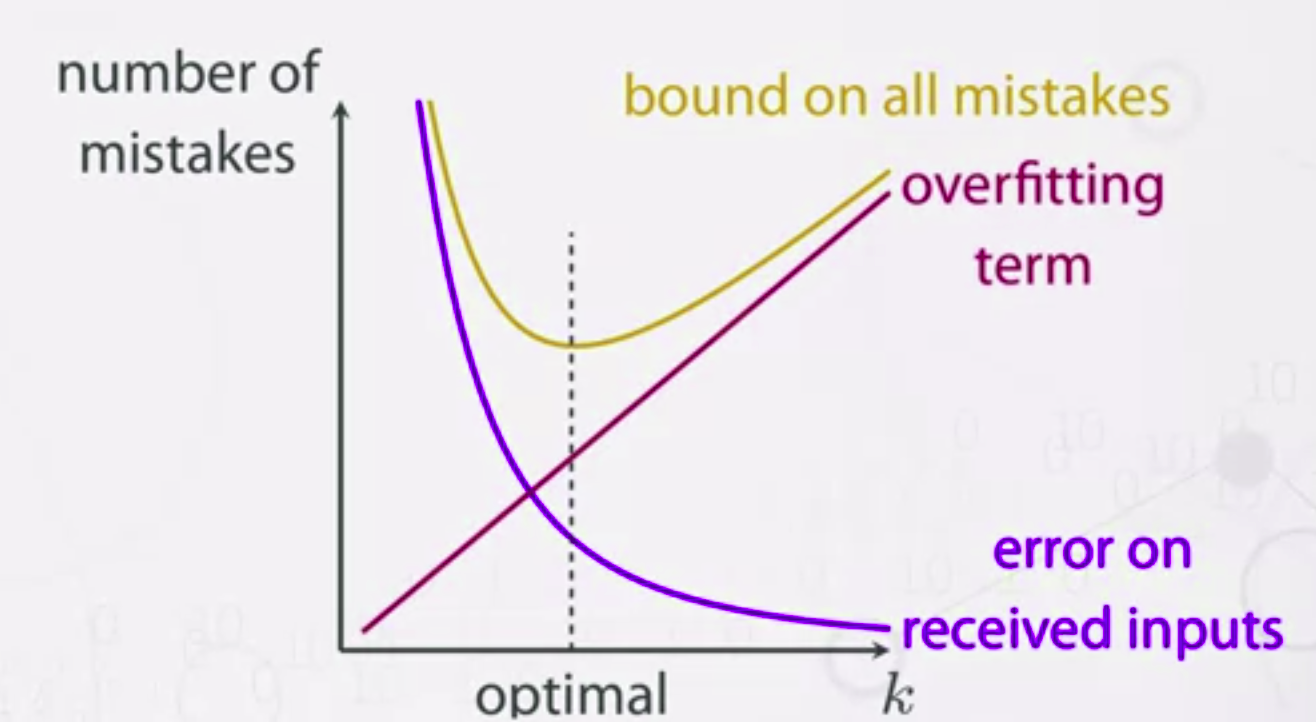

what can you do if you do not know $k$ in advance? Probably you may already have an idea. We can combine the two last methods.

> In this quiz, you need to adapt the weighted majority algorithm to decision trees. You need to present an online learning algorithm that uses decision trees of any size and makes as few mistakes as possible. 
>
>Let $\mathcal H_k$ denote the set of decision trees with at most $k$ nodes. You may use the weights $w_k = 2/k^2$. You may assume that some value $\beta$ with $0 < \beta < 1$ is fixed.
>
>Write down the variant of the weighted majority algorithm for decision trees, that does not require an estimate of the size $k$ of a good decision tree. Your algorithm should have a good theoretical upper bound on the number of mistakes, see the next questions. 

Let $\mathcal y \in \{-1, +1\}, \beta \in (0,1)$

For each $f \in \mathcal H_k : w_{f,1} \gets 2/k^2$. (assign weight $2/k^2$ to each decision tree)

while True:  
$\;\;\;\;\;\;$Receive: $x_t$  
$\;\;\;\;\;\;$Predict: $\;\hat{y}_t = sgn(\sum_{f \in \mathcal H_k} w_{f,t}f(x_t)$)   
$\;\;\;\;\;\;$Receive: $y_t$  
$\;\;\;\;\;\;$For each $f\in \mathcal H_k$:  

<center>$w_{f, t+1} \gets \begin{cases} \beta \cdot w_{f,t} \;\;\;\; if \;\; \hat{y}_t \ne y_t \\ w_{f,t} \;\;\;\;\;\;\;\; otherwise \end{cases}$</center>

(each round, multiply the weight of classifier by $\beta$ if it predicted wrong label, otherwise, keep the weight as it is.)

>Assume that there exists some decision tree with $k$ nodes that for some positive value of $\beta<1$ makes at most $m$ mistakes on a given sequence $(x_1, y_1), (x_2, y_2), ..., (x_T, y_T)$.  
>
>Give a bound on the number of mistakes made by your algorithm on this sequence.
 
Upper bound of the number of mistakes made by this algorithm on this sequence is:

<center>$\LARGE \frac{m \log \frac{1}{\beta} + \log k^2 - 1}{\log \frac{2}{1+\beta}}$</center>

> Prove that the bound above is correct.

_Proof_

Let total weight $W_t = \sum_{f \in \mathcal H_k} w_{f,t}$

- If a wrong prediction is made in round $t$, then

$\sum\{w_{f,t} : f(x_t) \ne y_t\} \ge \frac{1}{2}W_t$

If the majority label is wrong, the weighted majority is wrong, then the total weight of classifiers that predicted wrongly, is at least half of the total weight.

- Since $0 < \beta < 1$, the total weight in round $t+1$, 

$W_{t+1} \le \beta \cdot \frac{1}{2}W_t + \frac{1}{2}W_t = \frac{1+\beta}{2}W_t$

Because we made a mistake, so at least 1/2 of the weight multiplied by $beta$, the total weight at least decreased by a factore $\frac{1+\beta}{2}$

- Since $W_1=1$, after $\tilde{m}$ mistakes we have 

$W_T \le (\frac{1+\beta}{2})^{\tilde{m}}$

- Assume that there exists some decision tree with $k$ nodes makes at most $m$ mistakes, so the lower bound of the total weight is

$\frac{2}{k^2}\beta^m \le W_T$

- Combine both inequalities

$\frac{2}{k^2}\beta^m \le (\frac{1+\beta}{2})^{\tilde{m}}$

Take log of logarithm of both side

$\log 2 - \log k^2 + m \log \beta \le \tilde{m} \log \frac{1+\beta}{2} $

$\implies \tilde{m} \log \frac{2}{1+\beta} \le -1 + \log k^2 + m \log \frac{1}{\beta} $

$\implies \tilde{m} \le \large \frac{m \log \frac{1}{\beta} + \log k^2 - 1}{\log \frac{2}{1+\beta}}$